# MACS 30200
## PS4

Jie Heng

5/28/2018

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy.linalg as LA
import scipy.stats as sts
import pandas as pd
%matplotlib notebook

## a

In [8]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
                           random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [10]:
rho = 0.85
mu= 11.4
z = np.zeros(500)
zt_ind = 1

In [11]:
for i in range(T):
    if i == 0:
        z[i] = rho
    else:
        z[i] = rho * z[i-1] + (1- rho) * mu + eps_vec[i]

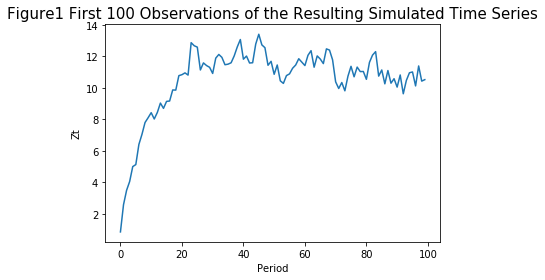

In [81]:
plt.plot(z[:100])
plt.title("Figure1 First 100 Observations of the Resulting Simulated Time Series", fontsize= 15)
plt.xlabel('Period')
plt.ylabel('Zt')
plt.show()

## b

In [18]:
z_vals = np.linspace(mu-3*sigma, mu+3*sigma, 5)

In [19]:
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

In [21]:
print('z_vals[2] should equal to mu, the statement is ', z_vals[2]==mu)

z_vals[2] should equal to mu, the statement is  True


## c

In [22]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

In [27]:
bins = np.digitize(z, z_cuts)
P = np.zeros(shape=(5,5))

In [30]:
for i in range(0,5):
    for j in range(0,5):
        count = 0
        total = 0
        for k in range(0,499):
            curr = bins[k]
            nxt = bins[k+1]
            if curr == i and nxt == j:
                count += 1
            if curr == i:
                total += 1
        P[i][j] = count/total

In [38]:
print('The P matrix is:')
print(P)

The P matrix is:
[[0.75757576 0.21212121 0.03030303 0.         0.        ]
 [0.09821429 0.51785714 0.33928571 0.04464286 0.        ]
 [0.03184713 0.22292994 0.47770701 0.23566879 0.03184713]
 [0.         0.04273504 0.34188034 0.5042735  0.11111111]
 [0.         0.         0.04255319 0.34042553 0.61702128]]


## d

In [57]:
myvec = np.array([0, 0, 1, 0, 0]).reshape(5, 1)
rv = np.dot(LA.matrix_power(P.T, 3),myvec)

In [52]:
rv

array([[0.08215695],
       [0.23362943],
       [0.3564361 ],
       [0.24976847],
       [0.07800906]])

In [50]:
print('The probability is', rv[4][0])

The probability is 0.07800905865368546


## e

In [63]:
eigvals, eigvecs = LA.eig(P.T)
eigvec = eigvecs[:, 1] / eigvecs[:, 1].sum()
stationary = eigvec

In [64]:
print('The stationary distribution of Zt is')
print(stationary)

The stationary distribution of Zt is
[0.13226453 0.2244489  0.31462926 0.23446894 0.09418838]


## f

In [65]:
z_0 = mu
x_vec = np.zeros(T)
x_t = z_0
xt_ind = 1

In [78]:
for t_ind in range(T):
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(P[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    x_t = x_tp1
    xt_ind = xtp1_ind

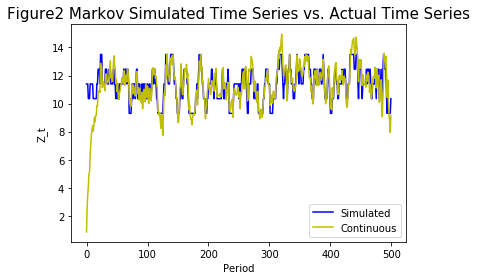

In [82]:
plt.plot(x_vec, color='b')
plt.plot(z, color = 'y')
plt.title('Figure2 Markov Simulated Time Series vs. Actual Time Series', fontsize= 15)
plt.xlabel('Period')
plt.ylabel('Z_t')
plt.legend(['Simulated', 'Continuous'])
plt.show()